<a href="https://colab.research.google.com/github/Laura-Neff/ClusteringUsingLabelledData/blob/main/ClusteringUsingLabelledData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Cars Dataset
Source : https://www.kaggle.com/abineshkumark/carsdata

Cars Data has Information about 3 brands/make of cars. Namely US, Japan, Europe.

Target of the data set to find the brand of a car using the parameters such as horsepower, Cubic inches, Make year, etc.

In [ ]:
data = pd.read_csv('cars.csv')

data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [ ]:
data.shape

(261, 8)

Taking full fraction of data
- It shuffles the data

In [ ]:
data = data.sample(frac=1)

In [ ]:
data.info()
#get rid of objects

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 126 to 26
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


Removing leading space from column names

In [ ]:
data.columns = data.columns.str.lstrip()
#strip leading space

In [ ]:
data.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [ ]:
data['cubicinches'] = pd.to_numeric(data['cubicinches'], errors='coerce')
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors='coerce')
#errors = coerce means invalid values are set to NaN

In [ ]:
data.dropna(inplace=True)
#drop all records with nans

In [ ]:
data.shape

(256, 8)

Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['brand'] = labelEncoder.fit_transform(data['brand'].astype(str))

data.head()

#convert string vals in numeric format

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
126,13.0,8,360.0,170,4654.0,13,1974,2
215,32.9,4,119.0,100,2615.0,15,1982,1
71,27.0,4,112.0,88,2640.0,19,1983,2
44,14.0,8,455.0,225,3086.0,10,1971,2
229,27.0,4,140.0,86,2790.0,16,1983,2


In [ ]:
data_x =  pd.DataFrame(data, columns=['mpg', 'cubicinches', 'cylinders', 'hp'])

label_y = data['brand']

From below scatter we can see as weight decreases mpg increases.

Text(0, 0.5, 'Weight')

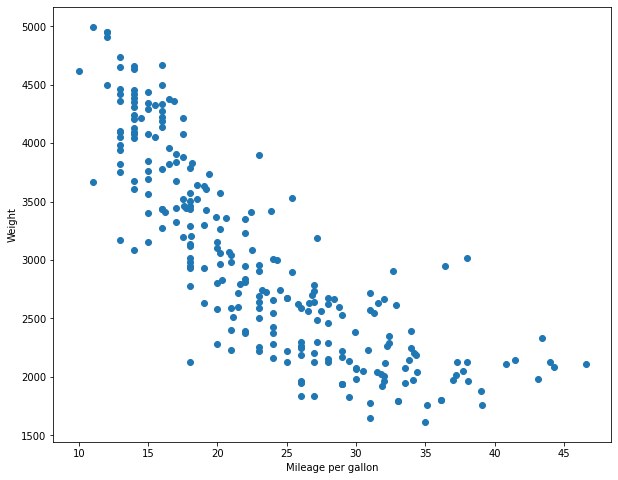

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(data['mpg'], data['weightlbs'])

plt.xlabel("Mileage per gallon")
plt.ylabel("Weight")

KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

- Plot the sum of squared distances from cluster center to number of clusters
   - inertia_ : Sum of squared distances of samples to their closest cluster center. A measure of how good the clustering is
   - it's hard to tell how many clusters will give us the best possible clustering. In order to figure out how many number of clusters work well for the data, visualize the sum of the squared distances of all of the data points from cluster centers

   - you want to choose the ELBOW number in the ELBOW plot 

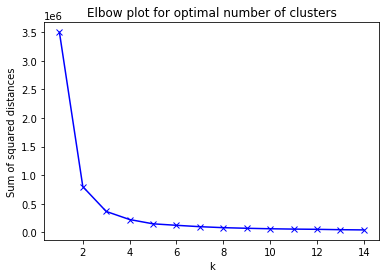

In [ ]:
#sum of data points from all cluster centers should be small
#clusters are compact and data points in a cluster are close together 
sum_of_squared_distances = []

K = range(1,15)

for k in K:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(data_x)

    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')

plt.title('Elbow plot for optimal number of clusters')
plt.show()



In [ ]:
k_means = KMeans(n_clusters=3)
k_means = k_means.fit(data_x)

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score (data_x, k_means.labels_)

print("Score = ", score)

Score =  0.6323149311159748


In [ ]:
from sklearn.metrics import homogeneity_score

hmg_score = homogeneity_score(label_y, k_means.labels_)

print("Homogeneity Score = ", hmg_score)

#a cluster has homogeneity if all clusters contain only points from the same class
#method takes in the actual label and the labels assigned by clustering model 

Homogeneity Score =  0.3155003627756417


Finding v measure score

<img src="https://media3.giphy.com/media/USnfWeCOHTHB3WX0aY/giphy_s.gif"></img>

In [ ]:
from sklearn.metrics import v_measure_score

vm_score = v_measure_score(label_y, k_means.labels_)

print("V Measure Score = ", vm_score)

#v measure score/harmonic mean of the homogeneity score and the completeness score - harmonic mean usually used to find the average of rates

V Measure Score =  0.30033756140227647


<img src="https://i.kym-cdn.com/entries/icons/mobile/000/025/543/eca.jpg"></img>

Finding completeness score

In [ ]:
from sklearn.metrics import completeness_score

comp_score = completeness_score(label_y, k_means.labels_)

print("Completeness Score = ", comp_score)

#clustering satisfies completeness if all the points that are members of the same class belong to the same cluster

Completeness Score =  0.2865653627353229


<img src="https://hungarytoday.hu/wp-content/uploads/2020/05/84261763_657262308148775_2968667943157628928_o-e1589799341315.jpg"></img>

Finding adjusted-rand score

In [ ]:
from sklearn.metrics import adjusted_rand_score

adj_r_score = adjusted_rand_score(label_y, k_means.labels_)

print("Adjusted_rand Score = ", adj_r_score)

#this is a similarity measure between clusters which is adjusted for chance i.e random labelling of data points 
#when clusters have been randomly generated on your data, this score will be close to 0. It'll be close to 1 for the best possible clustering

Adjusted_rand Score =  0.11281925794858022


<img src="https://static01.nyt.com/images/2016/08/05/us/05onfire1_xp/05onfire1_xp-videoSixteenByNineJumbo1600-v2.jpg"></img>

Finding adjusted mutual info score

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

adj_mutual = adjusted_mutual_info_score(label_y, k_means.labels_, average_method='arithmetic')

print("Adjusted mutual Score = ", adj_mutual)

#mutual information is the information you get about 1 random variable by observing another random variable adjusted to accomodate for chance
#I remember the example when you target ads to a customer based on what they bought in the past vs. targeting ads to a customer based on what other customers like them bought 

Adjusted mutual Score =  0.2945981842532957
